In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas
from scipy import optimize

In [8]:
%run programs.py
%run nps.py

(598, 640)

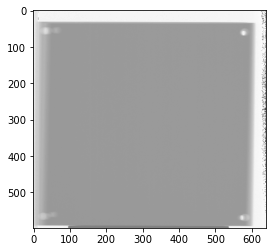

In [9]:
# Leemos el archivo de la Imagen total y la guardamos
img=readDat('nps2.dat',640)
image_png=Image.fromarray(img)
image_png.save('imagennps.png')
plt.imshow(img,cmap='gray')
img.shape

numero de lineas: 500 longitud de las lineas 500


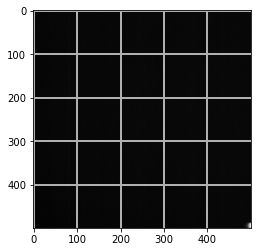

In [10]:
#Resizeamos la imagen y ponemos el grid de las divisiones:

image=region(img,75,575,75,575)
plt.grid(b=True,which='major',linewidth=2)

plt.savefig('image.eps')

plt.imshow(image,cmap='gray')

plt.savefig('grid.eps')

In [11]:
#creamos las regiones 2D 5x5:
divisiones=divisor(image,5)
divisiones[24].shape

(100, 100)

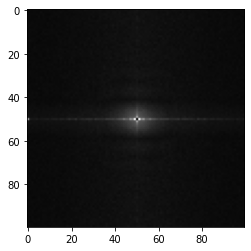

In [12]:
#fft de cada region, tras esto hacemos la media de todas las regiones y ploteamos la imagen voloteada (fftshift)
fastFourier=fft2(divisiones)
plt.imshow(np.fft.fftshift(sum(fastFourier)/25),cmap='gray')
aa=sum(fastFourier)/25 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


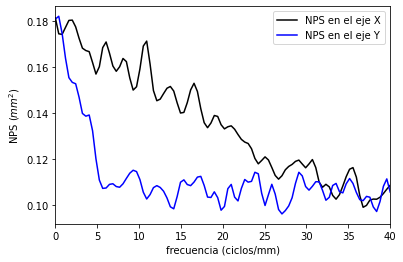

In [13]:


npx=(aa[50,:]+aa[49,:]+aa[48,:]+aa[51,:]+aa[52,:])*0.8*0.8/5
npy=(aa[:,50]+aa[:,49]+aa[:,48]+aa[:,51]+aa[:,52])*0.8*0.8/5
x=np.linspace(0,50,49)
x1=np.linspace(0,50,100)
npy1=scipy.interpolate.interp1d(x,npy[1:50],kind='cubic')(x1)
npx1=scipy.interpolate.interp1d(x,npx[1:50],kind='cubic')(x1)
plt.plot(x1*0.8,npx1,'k-',label='NPS en el eje X')
plt.plot(x1*0.8,npy1,'b-',label='NPS en el eje Y')
plt.ylabel('NPS $(mm^{2})$')
plt.xlabel('frecuencia (ciclos/mm)')
plt.xlim(0,40)
plt.legend(loc='best')
plt.savefig('nps.eps')
plt.show()
